<a href="https://colab.research.google.com/github/WafaSanaa/Machine-Learning/blob/main/Regression_Model_for_Life_Expectancy_Estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORT KEY LIBRARIES & DATASETS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import files

uploaded = files.upload()

Saving Life_Expectancy_Data.csv to Life_Expectancy_Data.csv


In [3]:
df = pd.read_csv('/content/Life_Expectancy_Data.csv')
df

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             2938 non-null   int64  
 1   Status                           2938 non-null   object 
 2   Life expectancy                  2928 non-null   float64
 3   Adult Mortality                  2928 non-null   float64
 4   infant deaths                    2938 non-null   int64  
 5   Alcohol                          2744 non-null   float64
 6   percentage expenditure           2938 non-null   float64
 7   Hepatitis B                      2385 non-null   float64
 8   Measles                          2938 non-null   int64  
 9    BMI                             2904 non-null   float64
 10  under-five deaths                2938 non-null   int64  
 11  Polio                            2919 non-null   float64
 12  Total expenditure   

In [9]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


# DATA VISUALIZATION

<Axes: >

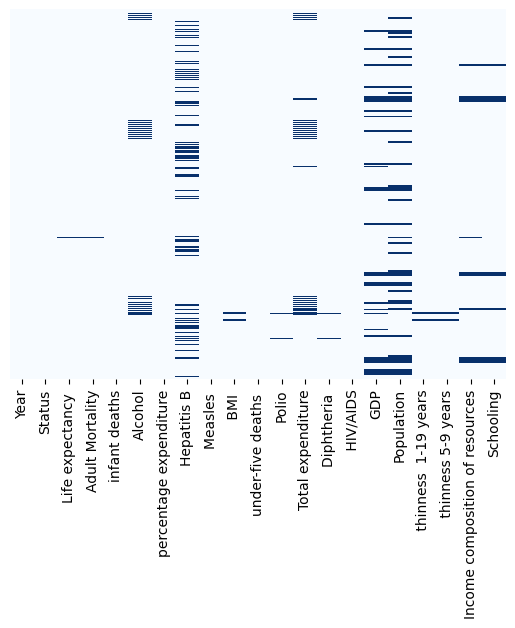

In [10]:
#check if there are any Null values
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = "Blues")

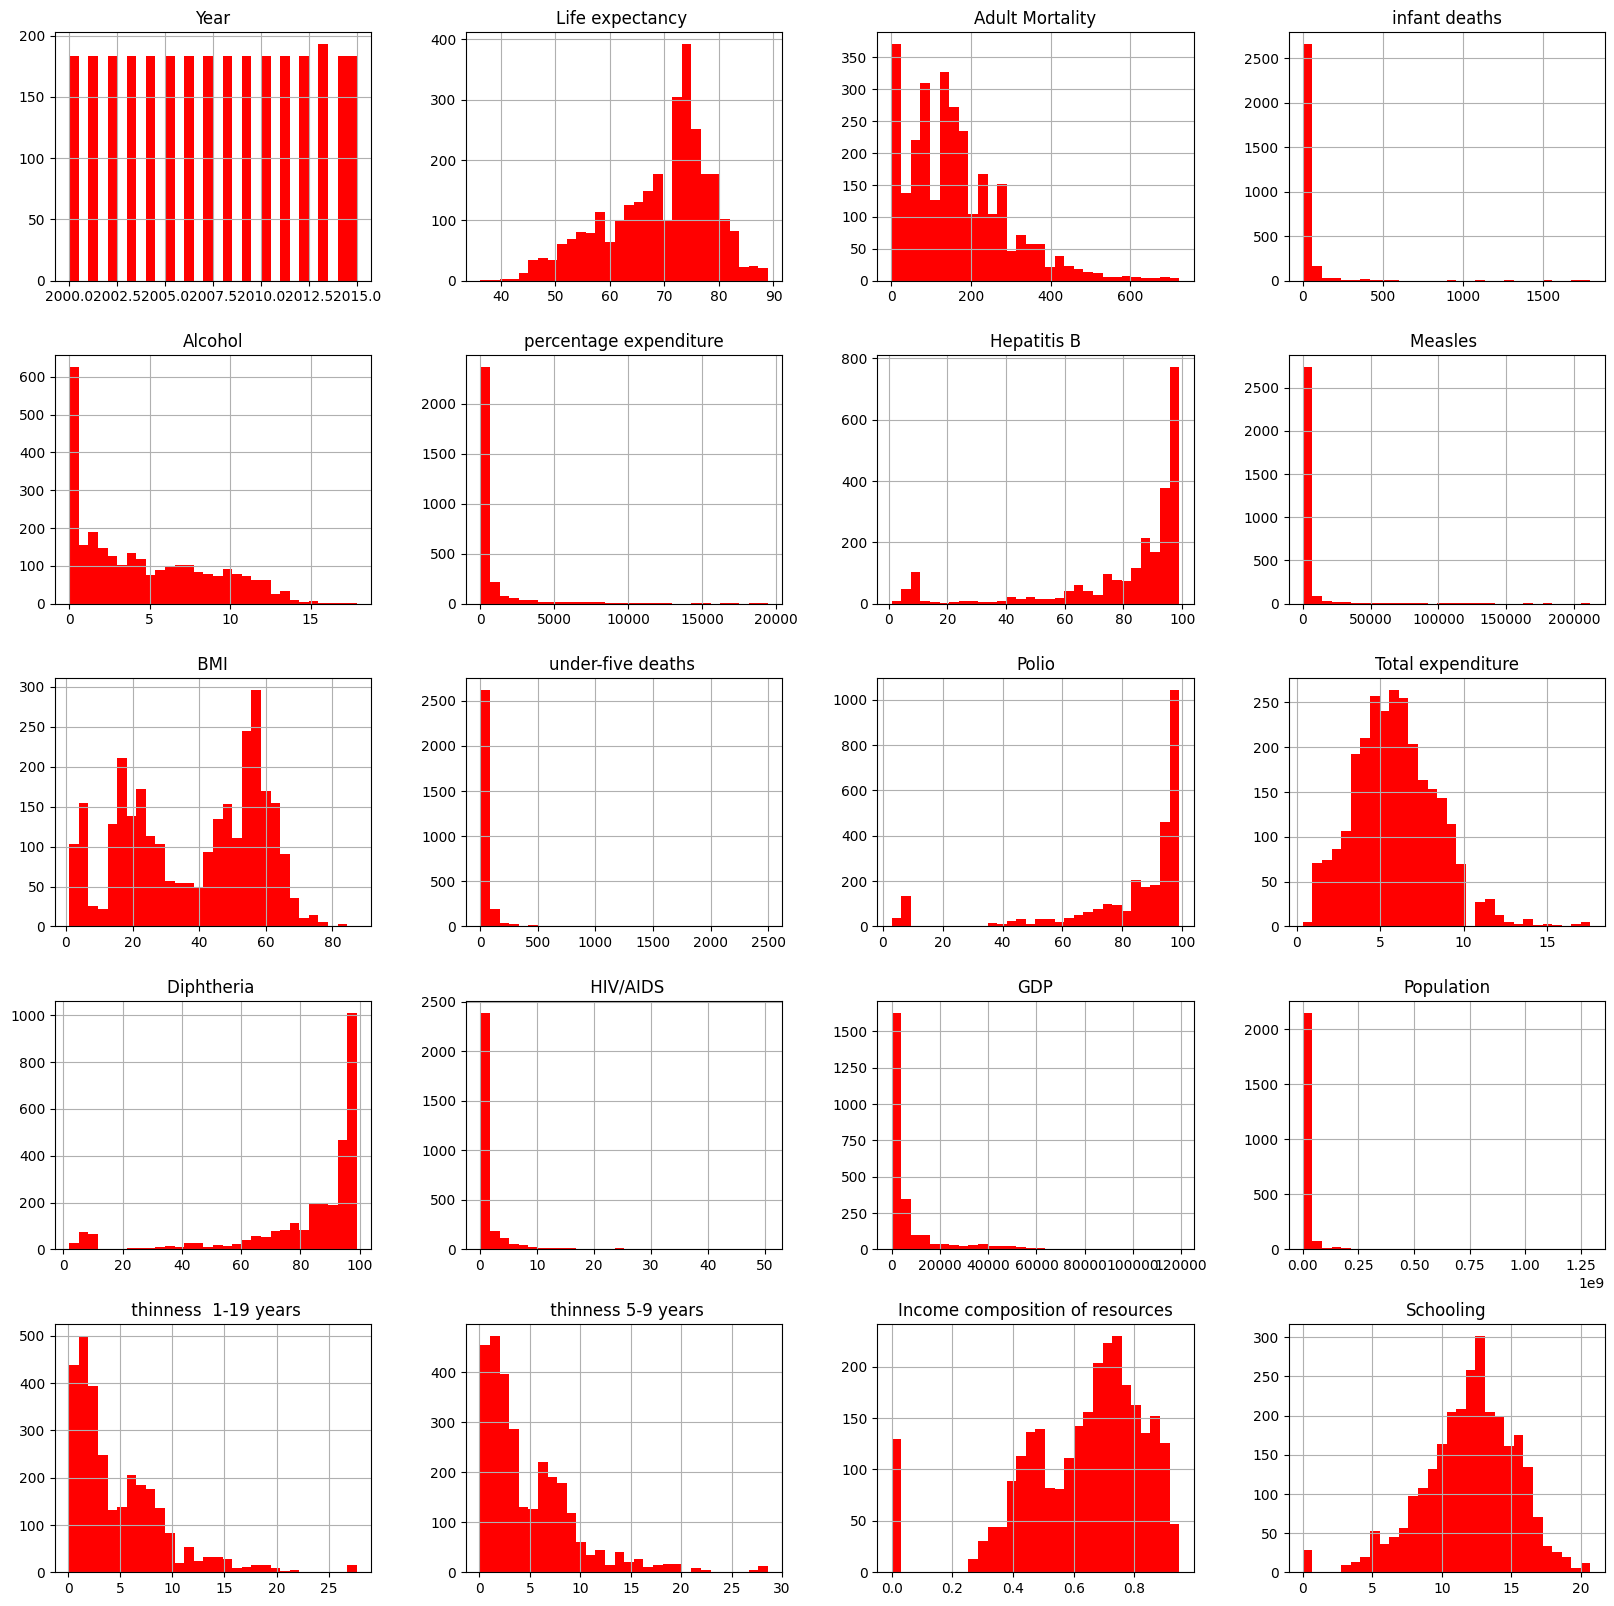

In [12]:
#Plot the histogram
df.hist(bins = 30, figsize = (20, 20), color = 'r');

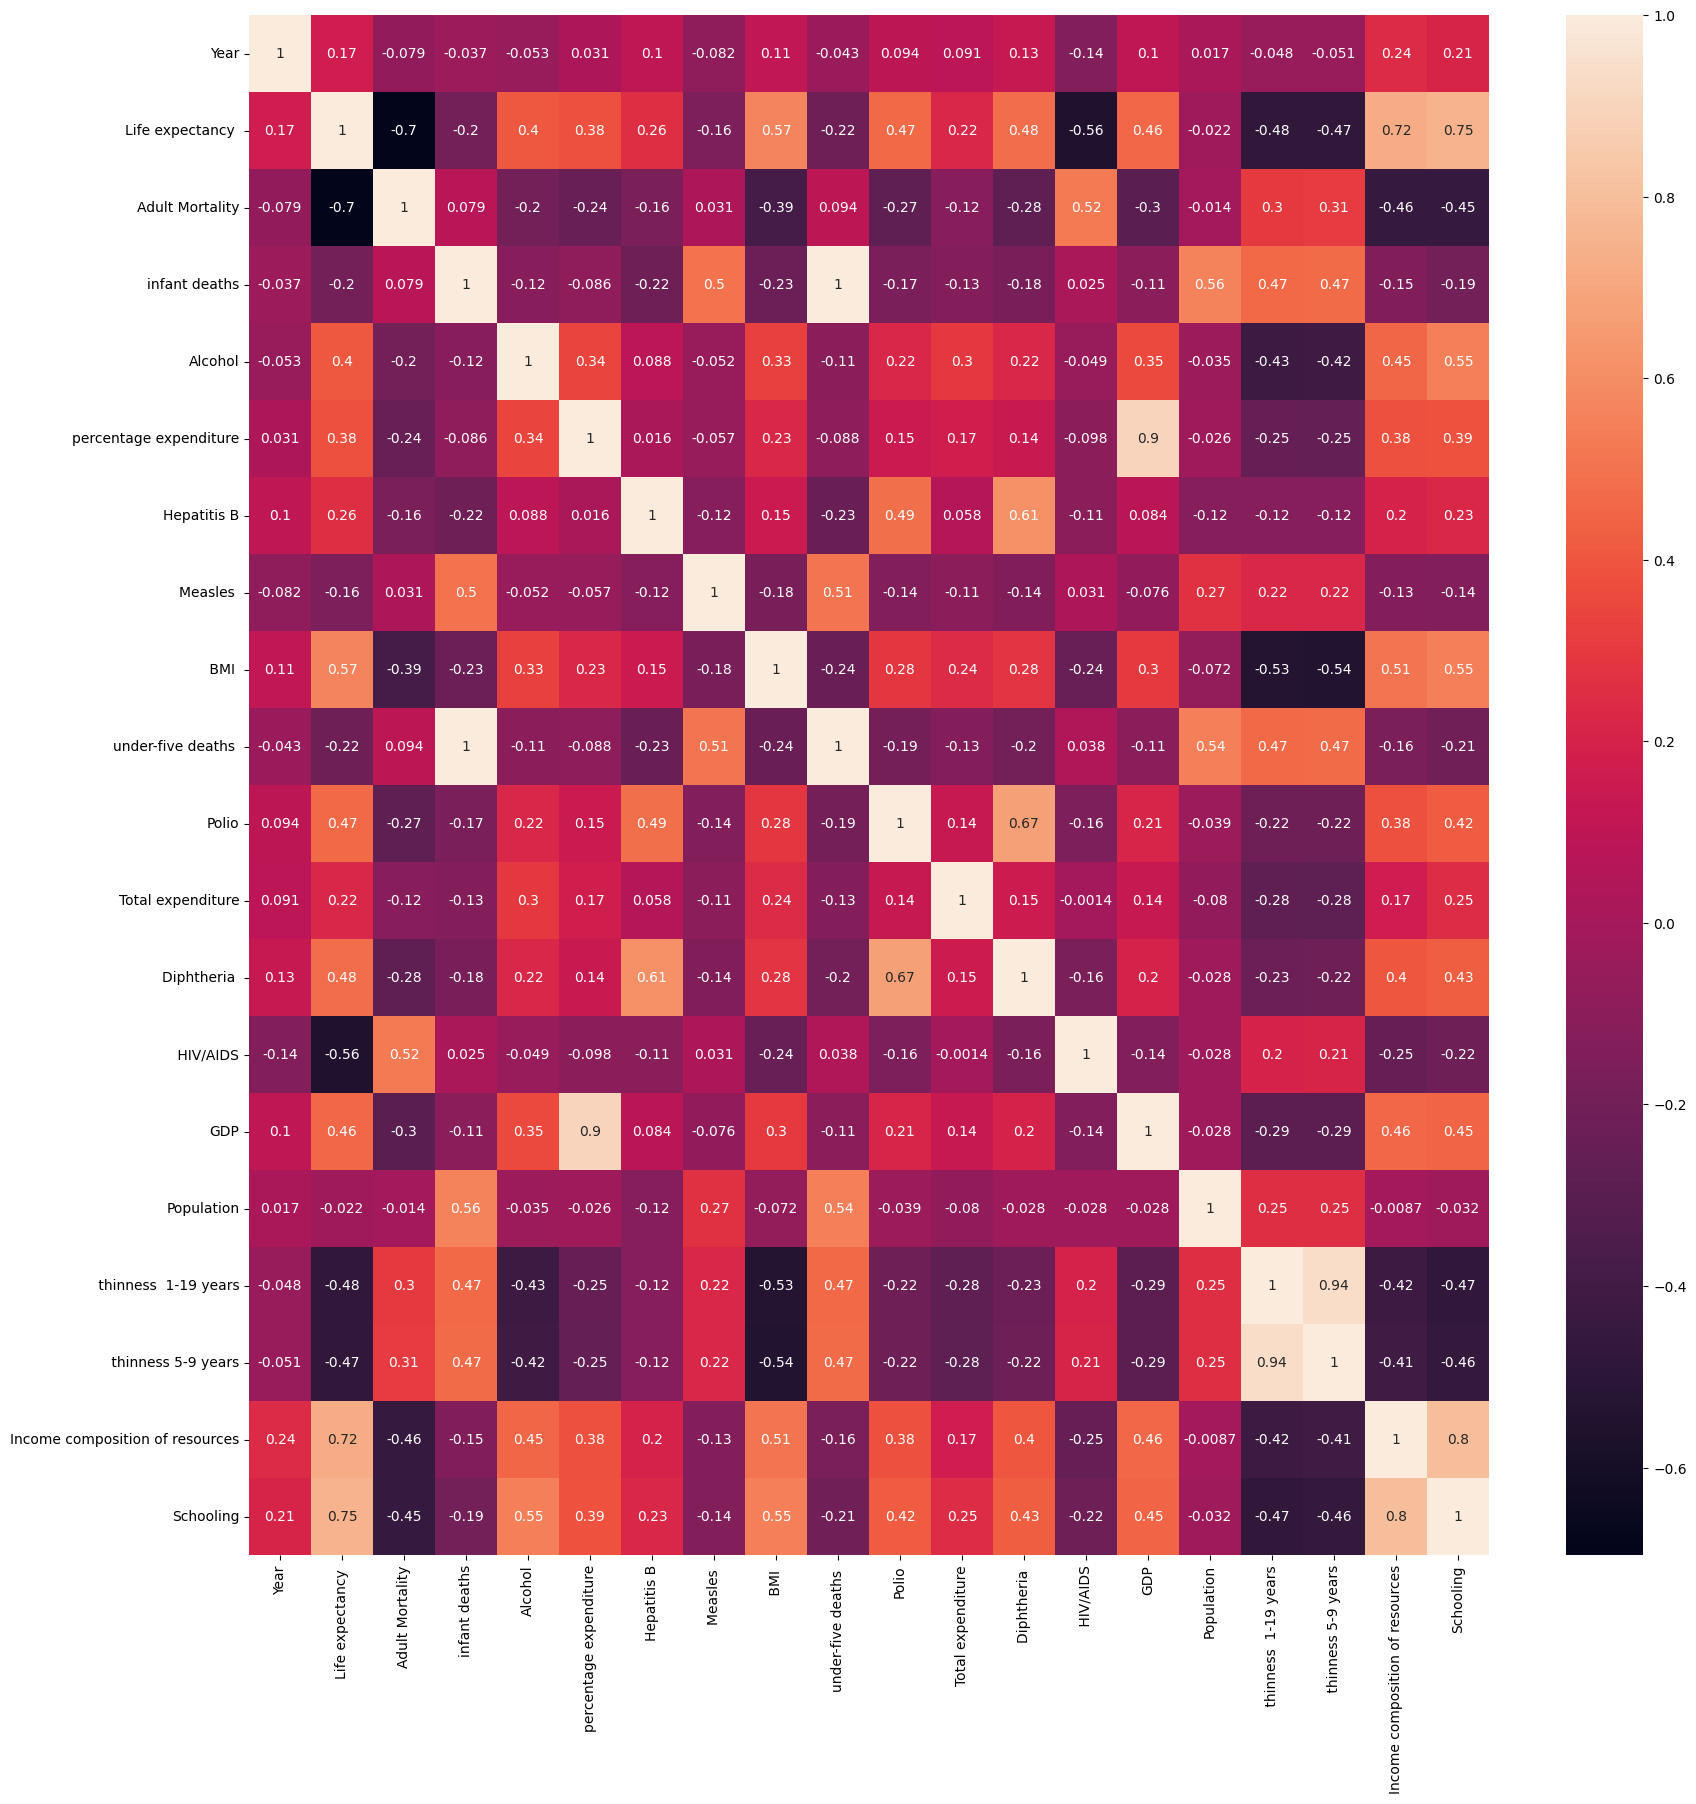

In [16]:
#Plot the correlation matrix
numeric_df = df.select_dtypes(include=['number'])  # Ne garde que les colonnes numériques
corr_matrix = numeric_df.corr()
plt.figure(figsize = (20,20))
sns.heatmap(corr_matrix, annot = True)
plt.show()

# PERFORM FEATURE ENGINEERING

In [17]:
#Perform one-hot encoding
df = pd.get_dummies(df, columns = ['Status'])

In [19]:
df.isnull().sum()

,0
Year,0
Life expectancy,10
Adult Mortality,10
infant deaths,0
Alcohol,194
percentage expenditure,0
Hepatitis B,553
Measles,0
BMI,34
under-five deaths,0


In [20]:
#Check the number of null values for the columns having null values
df.isnull().sum()[np.where(df.isnull().sum() !=0)[0]]

/tmp/ipython-input-268891006.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df.isnull().sum()[np.where(df.isnull().sum() !=0)[0]]


,0
Life expectancy,10
Adult Mortality,10
Alcohol,194
Hepatitis B,553
BMI,34
Polio,19
Total expenditure,226
Diphtheria,19
GDP,448
Population,652


In [21]:
#Since most of the are continous values we fill them with mean
df = df.apply(lambda x: x.fillna(x.mean()), axis = 0)

In [24]:
df.isnull().sum()[np.where(df.isnull().sum() !=0)[0]]

/tmp/ipython-input-631121709.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df.isnull().sum()[np.where(df.isnull().sum() !=0)[0]]


,0


<Axes: >

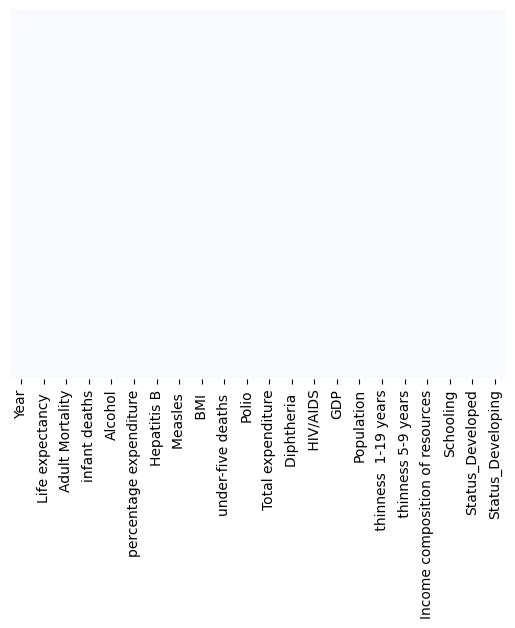

In [25]:
#Check if there are any Null values
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [70]:
print(df.columns.tolist())

['Year', 'Life expectancy', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years', 'thinness 5-9 years', 'Income composition of resources', 'Schooling', 'Status_Developed', 'Status_Developing']


In [81]:
#Create train and test data
x = df.drop(columns = ['Life expectancy'])
y = df['Life expectancy']

In [82]:
#Convert the data type to float32
x = np.array(x).astype('float32')
y = np.array(y).astype('float32')

In [83]:
#Spliting the data into trainig, testing and validation sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [84]:
print(x_train.shape)

(2350, 21)


In [85]:
print(y_train.shape)

(2350,)


# TRAIN AN XG-BOOST REGRESSION MODEL

In [86]:
!pip install xgboost

In [87]:
#Train an XGBoost regressor model
import xgboost as xgb
model = xgb.XGBRegressor(Objective = 'reg:squarederror', learning_rate = 0.1, max_depth = 30, n_estimators = 100)
model.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [13:53:27] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "Objective" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBRegressor(Objective='reg:squarederror', base_score=None, booster=None,
             callbacks=None, colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=30,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, ...)

# ASSESS TRAINED XG-BOOST MODEL PERFORMANCE

In [88]:
#predict the score of the trained model using the testing dataset
result = model.score(x_test, y_test)
print("Accuracy : {}".format(result))

Accuracy : 0.9687795639038086


In [89]:
#make prediction on the test data
y_predict = model.predict(x_test)
y_predict

array([73.29563 , 75.64345 , 74.85856 , 76.070435, 53.294907, 52.7887  ,
       66.8916  , 74.062195, 77.18093 , 56.552883, 52.53362 , 50.836258,
       57.547794, 72.841545, 69.02121 , 62.371563, 61.85281 , 79.52482 ,
       70.10036 , 78.79145 , 82.051476, 83.914696, 71.80285 , 68.16367 ,
       72.27227 , 67.09214 , 56.586502, 65.97321 , 82.74352 , 73.80636 ,
       67.28866 , 73.783966, 72.90824 , 72.39258 , 78.19181 , 47.41122 ,
       59.63862 , 72.94838 , 64.23769 , 73.90533 , 54.934128, 60.65629 ,
       75.33504 , 82.573204, 76.68566 , 49.325947, 79.86729 , 74.33749 ,
       62.501965, 71.24146 , 53.014675, 69.495575, 81.163185, 81.802055,
       74.50984 , 59.764217, 72.36667 , 72.52852 , 63.240326, 69.49884 ,
       78.35336 , 54.420864, 74.565575, 69.86581 , 52.228107, 54.31427 ,
       51.797806, 77.68284 , 62.405388, 70.182014, 82.58449 , 77.58709 ,
       73.40489 , 51.796757, 54.707783, 67.51784 , 64.072075, 75.79614 ,
       57.018505, 63.133507, 63.01125 , 63.508293, 

In [90]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt
k = x_test.shape[1]
n = len(x_test)
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)),'.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE)
print('MSE =',MSE)
print('MAE =',MAE)
print('r2 =',r2)
print('adj_r2 =',adj_r2)

RMSE = 1.645
MSE = 2.7047903537750244
MAE = 1.0577574968338013
r2 = 0.9687795639038086
adj_r2 = 0.9676212085009464
